# CS156 Assignment3
### Yuhao
### Fall 2019

## Part 0. Import Necessary Libraries

In [1]:
from PIL import Image
import PIL.ImageOps
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from prettytable import PrettyTable

## Part 1. Data Loading And Processing

In [6]:
# Upload all image names
man = glob('Man/*')
woman = glob('Woman/*')

# print(len(man))
# print(len(woman))

man_set=[]
woman_set=[]

# Open all images and store them in datasets
for file in man:
    with open(file, 'r+b') as f:
        with Image.open(f) as img:
            img= img.resize((20,10))
            man_set.append((np.array(img).flatten(),0))
            
for file in woman:
    with open(file, 'r+b') as f:
        with Image.open(f) as img:
            img= img.resize((20,10))
            woman_set.append((np.array(img).flatten(),1))

# Transform the data structure
man_set=np.asarray(man_set)
woman_set=np.asarray(woman_set)

X=np.append(man_set[:,0],woman_set[:,0])
y=np.append(man_set[:,1],woman_set[:,1])

X=np.stack(i for i in X)
y=np.stack(i for i in y)
# print(X)
# print(y)

# Separate the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

/Users/cyhsmac/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2802: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


## Part 2. SVC Model Training

In [4]:
# Train SVC Classifier Model
clf = LinearSVC(random_state=23)
clf.fit(X_train, y_train)

# Calculate Error Rates
print("Error Rate of SVC Model on Testing Set:", 1-accuracy_score(y_test, clf.predict(X_test)))
print("Error Rate of SVC Model on Training Set:", 1-accuracy_score(y_train, clf.predict(X_train)))

Error Rate of SVC Model on Testing Set: 0.42500000000000004
Error Rate of SVC Model on Training Set: 0.0031250000000000444


## Part 3. PCA Processing

Error Rate of PCA Processed Data on Testing Set: 0.4
Error Rate of PCA Processed Data on Training Set: 0.46875


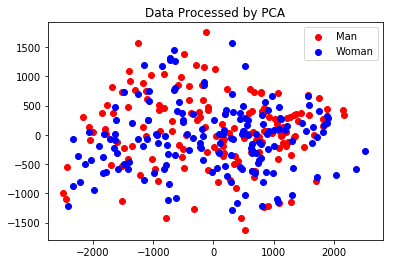

In [5]:
# Reduce dimension of the dataset with PCA
pca=PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
clf.fit(X_train_pca, y_train)

print("Error Rate of PCA Processed Data on Testing Set:", 1-accuracy_score(y_test, clf.predict(X_test_pca)))
print("Error Rate of PCA Processed Data on Training Set:", 1-accuracy_score(y_train, clf.predict(X_train_pca)))

# Plot the processed data's distribution after using PCA
for color,i,label in zip(['red','blue'],[0,1],['Man','Woman']):
    plt.scatter(X_train_pca[y_train==i,0],X_train_pca[y_train==i,1],color=color,label=label)
plt.title("Data Processed by PCA")
plt.legend()
plt.show()

## Part 4. LDA Processing

Error Rate of LDA Processed Data on Testing Set: 0.125
Error Rate of LDA Processed Data on Training Set: 0.034375000000000044


/Users/cyhsmac/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


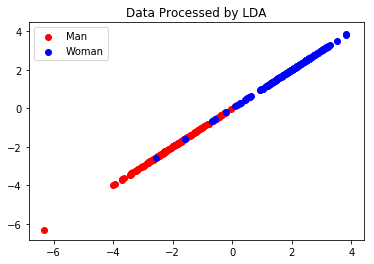

In [114]:
# Reduce dimension of the dataset with LDA
lda=LinearDiscriminantAnalysis(n_components=10)
X_train_lda=lda.fit(X_train, y_train).transform(X_train)
X_test_lda=lda.fit(X_test, y_test).transform(X_test)
clf.fit(X_train_lda, y_train)

print("Error Rate of LDA Processed Data on Testing Set:", 1-accuracy_score(y_test, clf.predict(X_test_lda)))
print("Error Rate of LDA Processed Data on Training Set:", 1-accuracy_score(y_train, clf.predict(X_train_lda)))

# Plot the processed data's distribution after using LDA
for color,i,label in zip(['red','blue'],[0,1],['Man','Woman']):
    plt.scatter(X_train_lda[y_train==i,0],X_train_lda[y_train==i,0],color=color,label=label)
plt.title("Data Processed by LDA")
plt.legend()
plt.show()

## Part 5. Conclusion

In [116]:
# Present the results we calculated above in a table
x= PrettyTable(["Set Name", "Raw Data", "PCA Data", "LDA Data"])
x.add_row(["Test Set",0.425,0.400,0.125])
x.add_row(["Train set",0.003,0.469,0.034])
print(x)

+-----------+----------+----------+----------+
|  Set Name | Raw Data | PCA Data | LDA Data |
+-----------+----------+----------+----------+
|  Test Set |  0.425   |   0.4    |  0.125   |
| Train set |  0.003   |  0.469   |  0.034   |
+-----------+----------+----------+----------+


The results of the three questions are presented in the table above. 

For direct application of linear SVC classifier on the raw data, we observe that the error rate on test set os 0.425, and the error rate on train set is only 0.003. It shows that the model fits much better to the train set, which is considered as overfitting. It performs bad to predict new data.

For the method which processes data with PCA to reduce the dimension and applies SVC, we can see that the error rate on test set is 0.4 and on train set is 0.469. In this case, we can obserse a similar error rate on the two sets. However, both error rates are high, which show bad performances on both sets. The reason which causes this result may be: PCA is an unsupervised method, which reduces the dimension of datasets with labels not included. Therefore, it only tries to amplify the variance of variables, but fails to make sense for our classifier.

For the method which processes data with LDA, we can see that the error rate on test set is 0.125 and on train set is 0.034. The two rates are similar and the error rate on test set is the smallest among the three methods. LDA is a supervised method which makes it perform well on classifying between the two datasets. As we can see in the graph we plot in the section of LDA, the feature are captured after the data is processed, where we can easily distinguish the different clusters of Man's and Woman's Clothes.